In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# df = pd.read_csv('./data/Payload_data_UNSW.csv')

In [3]:
train = pd.read_csv('./data/UNSW_NB15/UNSW_NB15_testing-set.csv', sep=',', encoding='cp1252')
test = pd.read_csv('./data/UNSW_NB15/UNSW_NB15_training-set.csv', sep=',', encoding='cp1252')
train.shape, test.shape

((175341, 45), (82332, 45))

In [4]:
df = pd.concat([train, test])
df.shape

(257673, 45)

In [5]:
pd.set_option('display.max_columns', None)
pd.DataFrame(df.isna().sum().to_dict(), index=[0])

,ï»¿id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.isnull().sum().sum()

0

<AxesSubplot: >

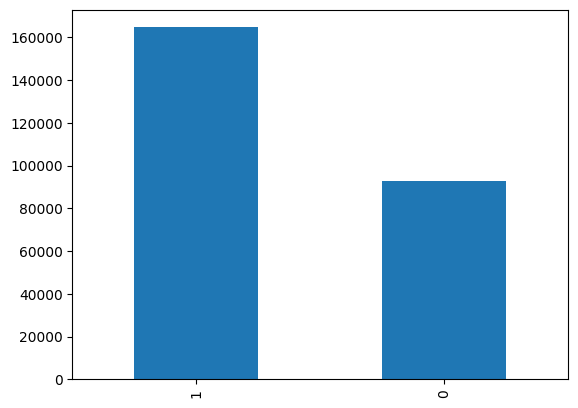

In [7]:
df.label.value_counts().plot.bar()

In [15]:
df.label.value_counts(normalize=True)

1    0.639077
0    0.360923
Name: label, dtype: float64

<AxesSubplot: >

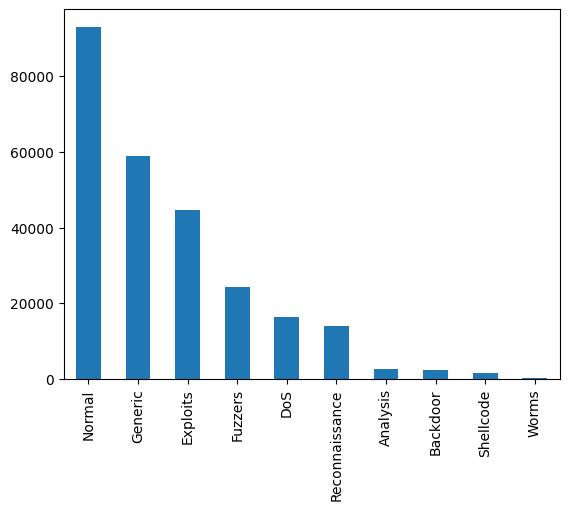

In [16]:
df.attack_cat.value_counts().plot.bar()

In [8]:
cat_features = df.columns[df.dtypes == 'object']
cat_features

Index(['proto', 'service', 'state', 'attack_cat'], dtype='object')

proto 
 {'tcp': 123041, 'udp': 92701, 'unas': 15599, 'arp': 3846, 'ospf': 3271, 'sctp': 1474, 'any': 396, 'gre': 313, 'rsvp': 264, 'ipv6': 262, 'sun-nd': 255, 'mobile': 253, 'swipe': 253, 'pim': 253, 'sep': 251, 'leaf-1': 133, 'xns-idp': 133, 'prm': 133, 'pri-enc': 132, 'ipip': 132, 'mhrp': 132, 'tlsp': 132, 'sdrp': 132, 'ipx-n-ip': 132, 'i-nlsp': 132, 'a/n': 132, 'tp++': 132, 'ifmp': 132, 'encap': 132, 'micp': 132, 'skip': 132, 'larp': 132, 'ippc': 132, 'idpr': 132, 'merit-inp': 132, 'sps': 132, 'ptp': 132, 'fire': 132, 'smp': 132, 'isis': 132, 'sat-mon': 132, 'srp': 132, 'ddx': 132, 'uti': 132, 'visa': 132, 'nvp': 132, 'trunk-2': 132, 'iso-tp4': 132, 'irtp': 132, 'leaf-2': 132, 'trunk-1': 132, 'dcn': 132, 'mux': 132, 'chaos': 132, 'xnet': 132, 'pup': 132, 'igp': 132, 'secure-vmtp': 132, 'emcon': 132, 'bbn-rcc': 132, 'st2': 132, 'ipnip': 132, 'ip': 132, 'ggp': 132, 'iplt': 132, 'crudp': 132, 'vines': 132, 'stp': 132, 'l2tp': 132, 'sm': 132, 'iatp': 132, 'cpnx': 132, 'vrrp': 132, 'idpr

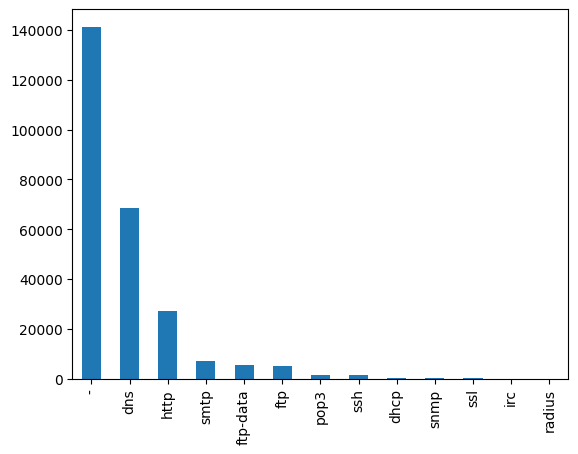

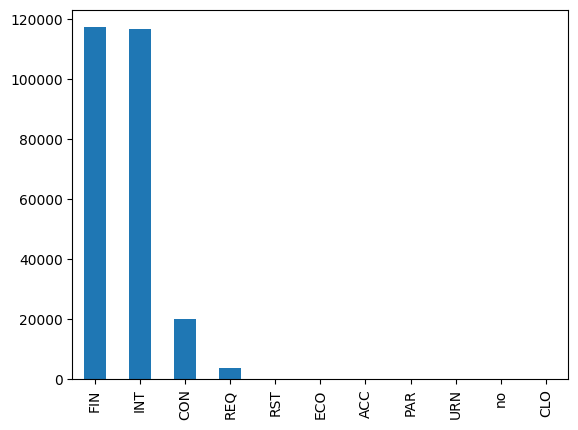

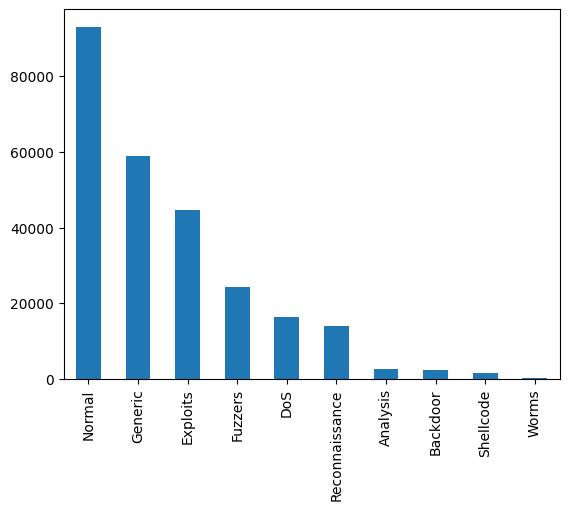

In [9]:
for i in cat_features:
    if i == 'proto':
        print(i, '\n', df[i].value_counts().to_dict())
    else :
        plt.figure()
        df[i].value_counts().plot.bar()

<AxesSubplot: >

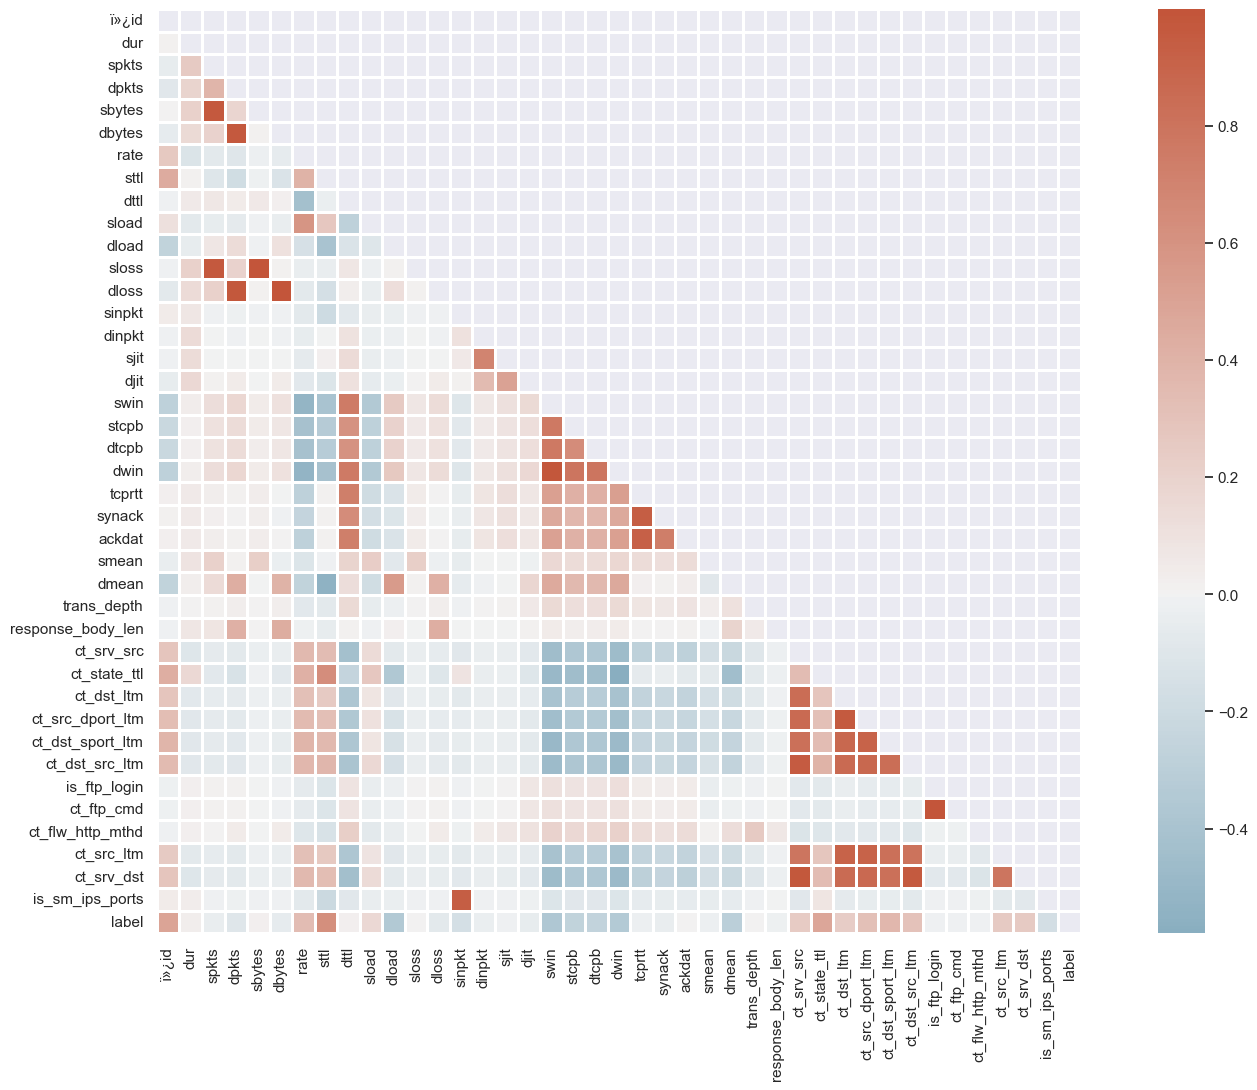

In [19]:
import seaborn as sns

sns.set_theme('notebook')
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)

plt.figure(figsize=(20,12))
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=1.)